In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



In [29]:
data = np.genfromtxt("glass.data.csv", delimiter=',')


print(data.shape,data[0:5,:])

(214, 11) [[1.00000e+00 1.52101e+00 1.36400e+01 4.49000e+00 1.10000e+00 7.17800e+01
  6.00000e-02 8.75000e+00 0.00000e+00 0.00000e+00 1.00000e+00]
 [2.00000e+00 1.51761e+00 1.38900e+01 3.60000e+00 1.36000e+00 7.27300e+01
  4.80000e-01 7.83000e+00 0.00000e+00 0.00000e+00 1.00000e+00]
 [3.00000e+00 1.51618e+00 1.35300e+01 3.55000e+00 1.54000e+00 7.29900e+01
  3.90000e-01 7.78000e+00 0.00000e+00 0.00000e+00 1.00000e+00]
 [4.00000e+00 1.51766e+00 1.32100e+01 3.69000e+00 1.29000e+00 7.26100e+01
  5.70000e-01 8.22000e+00 0.00000e+00 0.00000e+00 1.00000e+00]
 [5.00000e+00 1.51742e+00 1.32700e+01 3.62000e+00 1.24000e+00 7.30800e+01
  5.50000e-01 8.07000e+00 0.00000e+00 0.00000e+00 1.00000e+00]]


In [30]:
X = data[:, 1:10]
y = data[:, 10]
print(X.shape, y.shape)


(214, 9) (214,)


In [31]:
y = y.reshape(-1,1)
print(y.shape)

(214, 1)


In [32]:
print(X[0:5,:])

[[1.52101e+00 1.36400e+01 4.49000e+00 1.10000e+00 7.17800e+01 6.00000e-02
  8.75000e+00 0.00000e+00 0.00000e+00]
 [1.51761e+00 1.38900e+01 3.60000e+00 1.36000e+00 7.27300e+01 4.80000e-01
  7.83000e+00 0.00000e+00 0.00000e+00]
 [1.51618e+00 1.35300e+01 3.55000e+00 1.54000e+00 7.29900e+01 3.90000e-01
  7.78000e+00 0.00000e+00 0.00000e+00]
 [1.51766e+00 1.32100e+01 3.69000e+00 1.29000e+00 7.26100e+01 5.70000e-01
  8.22000e+00 0.00000e+00 0.00000e+00]
 [1.51742e+00 1.32700e+01 3.62000e+00 1.24000e+00 7.30800e+01 5.50000e-01
  8.07000e+00 0.00000e+00 0.00000e+00]]


In [33]:
print(y[0:5,:])

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [34]:
mean_vals = np.mean(X, axis=0)
std_dev = np.std(X, axis=0)
min_vals = np.min(X, axis=0)
max_vals = np.max(X, axis=0)
print('Mean Values:', np.round(mean_vals, 4))
print('Standard Deviation:', np.round(std_dev,4))
print('Min Values:', np.round(min_vals, 4))
print('Max Values:', np.round(max_vals,4))


Mean Values: [1.51840e+00 1.34079e+01 2.68450e+00 1.44490e+00 7.26509e+01 4.97100e-01
 8.95700e+00 1.75000e-01 5.70000e-02]
Standard Deviation: [0.003  0.8147 1.439  0.4981 0.7727 0.6507 1.4198 0.4961 0.0972]
Min Values: [ 1.5112 10.73    0.      0.29   69.81    0.      5.43    0.      0.    ]
Max Values: [ 1.5339 17.38    4.49    3.5    75.41    6.21   16.19    3.15    0.51  ]


<Figure size 1200x1200 with 0 Axes>

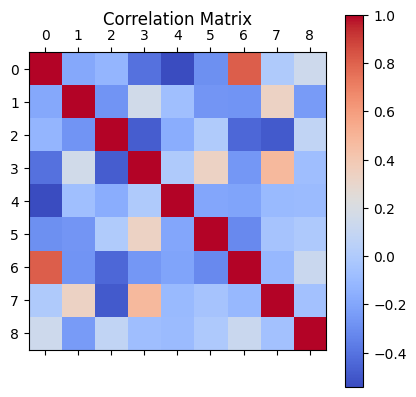

In [35]:
cor_matrix = np.corrcoef(X, rowvar=False)
# Plot the correlation matrix
plt.figure(figsize=(12, 12))
cax = plt.matshow(cor_matrix, cmap='coolwarm')
plt.colorbar(cax)
plt.title('Correlation Matrix', pad=20)
plt.show()



In [37]:
encoder = OneHotEncoder(sparse=False)
y_enc = encoder.fit_transform(y.reshape(-1, 1))
print(y_enc.shape)

(214, 6)


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y_enc, test_size=0.2,
random_state=42)

In [41]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [48]:
len(y_enc[0])

6

In [49]:
# Build the neural network model
model = Sequential()
# Add layers to the model
model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(len((y_enc[0])), activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 16)                160       
                                                                 
 dense_14 (Dense)            (None, 8)                 136       
                                                                 
 dense_15 (Dense)            (None, 4)                 36        
                                                                 
 dense_16 (Dense)            (None, 6)                 30        
                                                                 
Total params: 362
Trainable params: 362
Non-trainable params: 0
_________________________________________________________________
None


Epoch 1/50
5/5 [==============================] - 1s 56ms/step - loss: 1.8780 - accuracy: 0.1397 - val_loss: 2.0123 - val_accuracy: 0.1143
Epoch 2/50
5/5 [==============================] - 0s 9ms/step - loss: 1.8500 - accuracy: 0.1691 - val_loss: 1.9789 - val_accuracy: 0.1429
Epoch 3/50
5/5 [==============================] - 0s 9ms/step - loss: 1.8259 - accuracy: 0.2132 - val_loss: 1.9501 - val_accuracy: 0.1714
Epoch 4/50
5/5 [==============================] - 0s 8ms/step - loss: 1.8067 - accuracy: 0.1985 - val_loss: 1.9266 - val_accuracy: 0.2000
Epoch 5/50
5/5 [==============================] - 0s 8ms/step - loss: 1.7920 - accuracy: 0.1838 - val_loss: 1.9072 - val_accuracy: 0.1429
Epoch 6/50
5/5 [==============================] - 0s 8ms/step - loss: 1.7785 - accuracy: 0.1765 - val_loss: 1.8914 - val_accuracy: 0.1429
Epoch 7/50
5/5 [==============================] - 0s 8ms/step - loss: 1.7661 - accuracy: 0.1765 - val_loss: 1.8800 - val_accuracy: 0.1714
Epoch 8/50
5/5 [=================

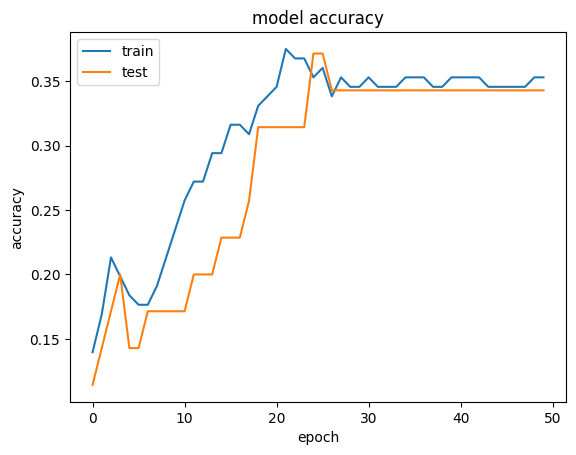

In [50]:
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32,
validation_split=0.2)



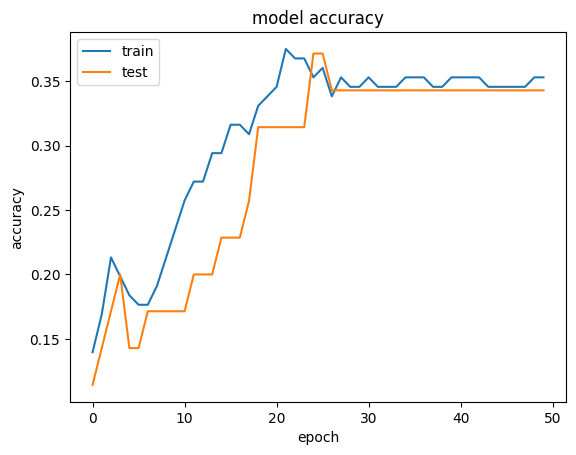

In [51]:
# Visualize Model Training History
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


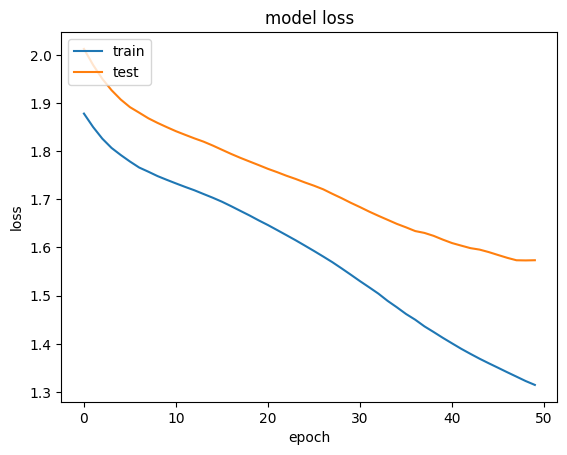

In [52]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [53]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)
predictions = model.predict (X_test)
print(predictions.shape, y_test.shape)


2/2 [==============================] - 0s 2ms/step - loss: 12.9755 - accuracy: 0.0930
Test Loss: 12.975503921508789
Test Accuracy: 0.09302325546741486
2/2 [==============================] - 0s 1ms/step
(43, 6) (43, 6)


In [54]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1))
print(cm)
cr = classification_report(np.argmax(y_test, axis=1), np.argmax(predictions,
axis=1))
print(cr)
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True,
show_layer_names=True)


[[ 0  0  0 11  0  0]
 [ 0  0  0 14  0  0]
 [ 0  0  0  3  0  0]
 [ 0  0  0  4  0  0]
 [ 0  0  0  3  0  0]
 [ 0  0  0  8  0  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.00      0.00      0.00        14
           2       0.00      0.00      0.00         3
           3       0.09      1.00      0.17         4
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         8

    accuracy                           0.09        43
   macro avg       0.02      0.17      0.03        43
weighted avg       0.01      0.09      0.02        43

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


C:\Users\schmi\anaconda3\envs\TF23\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\schmi\anaconda3\envs\TF23\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\schmi\anaconda3\envs\TF23\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
